# Demo 3: A general IVP solver

In this jupyter notebook, we will learn how to use the general IVP solver we wrote in `./project1/solver.py`.
Let's start from reproducing the results in `demo1` and `demo2`.


Before we start using the IVP solver, let's import the related packages first.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import solver as mysolver             # your own solver
import solution.solver_sol as solver  # compare your results with solution
from scipy.integrate import solve_ivp as solver_scipy

# Note that if the path of your jupyter notebook is different from the path of the solver.py file, 
# you need to add the relative path of the solver.py file during the import, for example:

#import project1.solver as mysolver
#import project1.solution.solver_sol as solver

# Or, you can add the path of the solver.py file to the system path, for example:
# import sys
# sys.path.append('path_of_solver.py')


Now, let's start to reproduce `demo1` and `demo2`.
Set
* t0 = 0 sec and tmax = 20 sec
* time step dt = 0.01
* The spring constant `K` = 1
* The mass `M` = 1
* Initial condition: `x=1`, `v=0`.

In [17]:
# define the y' funciotn
def func(t, y, k, m):
    yderive = np.zeros(len(y))
    yderive[0] = y[1]
    yderive[1] = -k/m*y[0]
    return yderive
    


# Prepare the input arguments
t0 = 0
tmax = 20
dt = 0.01
K = 1
M = 1
y0 = np.array([1, 0])
t_span = (t0, tmax)
t_eval = np.arange(t0, tmax, dt)
A = y0[0] + y0[1]/np.sqrt(K/M)

# use the IVP solver
sol_euler = mysolver.solve_ivp(func, t_span, y0, 
                    method="Euler",t_eval=t_eval, args=(K,M))
sol_rk2 = mysolver.solve_ivp(func, t_span, y0, 
                    method="RK2",t_eval=t_eval, args=(K,M))
sol_rk4 = mysolver.solve_ivp(func, t_span, y0, 
                    method="RK4",t_eval=t_eval, args=(K,M))
sol_analytic = A*np.cos(np.sqrt(K/M)*t_eval)

sol_euler_ans = solver.solve_ivp(func, t_span, y0, 
                    method="Euler",t_eval=t_eval, args=(K,M))
sol_rk2_ans = solver.solve_ivp(func, t_span, y0, 
                    method="RK2",t_eval=t_eval, args=(K,M))
sol_rk4_ans = solver.solve_ivp(func, t_span, y0, 
                    method="RK4",t_eval=t_eval, args=(K,M))

sol_scipy = solver_scipy(func, t_span, y0, 
                    method="RK45",t_eval=t_eval, args=(K,M))





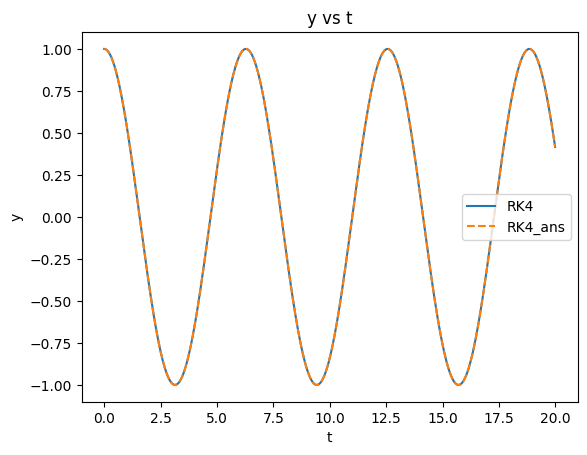

In [19]:
# visualize the results
plt.figure()
# plt.plot(t_eval, sol_euler[0], label='Euler')
# plt.plot(t_eval, sol_rk2[0], label='RK2')
plt.plot(t_eval, sol_rk4[0], label='RK4')
# plt.plot(t_eval, sol_analytic, label='Analytic')
# plt.plot(t_eval, sol_euler_ans[0], label='Euler_ans', linestyle='dashed')
# plt.plot(t_eval, sol_rk2_ans[0], label='RK2_ans', linestyle='dashed')
plt.plot(t_eval, sol_rk4_ans[0], label='RK4_ans', linestyle='dashed')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('y vs t')
plt.show()




# Damped Oscillation

When there is a damping force ($F_{\rm damp}=-\lambda \dot{x}$), the equation of motion becomes,

$$
m\ddot{x} + \lambda \dot{x} + kx = 0
$$

### Exercise

* Use the IVP solver we developed. The only differences are the `func` and initial conditions.
* Modify the y' function (`func`) to simulate a damped oscillator (from t=0 to 20). IC: at t=0, K=M=1, A=1, $\phi= 0$,$\lambda=0.2$.
* Make plots of position(t), velocity(t), and total energy (t). Comapred your results with analytical solutions.

In [11]:
# TODO
# define the y' funciotn
def func(t, y, k, m, lam):
    yderive = np.zeros(len(y))
    yderive[0] = y[1]
    yderive[1] = -k/m*y[0] - lam/m*y[1]
    return yderive

# Prepare the input arguments
t0 = 0
tmax = 20
dt = 0.01
K = 1
M = 1
LAM = 0.2
y0 = np.array([1, 0])
t_span = (t0, tmax)
t_eval = np.arange(t0, tmax, dt)
A = 1
PHI = 0

# use the IVP solver
sol_euler = mysolver.solve_ivp(func, t_span, y0, 
                    method="Euler",t_eval=t_eval, args=(K,M,LAM))
sol_rk2 = mysolver.solve_ivp(func, t_span, y0, 
                    method="RK2",t_eval=t_eval, args=(K,M,LAM))
sol_rk4 = mysolver.solve_ivp(func, t_span, y0, 
                    method="RK4",t_eval=t_eval, args=(K,M,LAM))

sol_euler_ans = solver.solve_ivp(func, t_span, y0, 
                    method="Euler",t_eval=t_eval, args=(K,M,LAM))
sol_rk2_ans = solver.solve_ivp(func, t_span, y0, 
                    method="RK2",t_eval=t_eval, args=(K,M,LAM))
sol_rk4_ans = solver.solve_ivp(func, t_span, y0, 
                    method="RK4",t_eval=t_eval, args=(K,M,LAM))

sol_scipy = solver_scipy(func, t_span, y0, 
                    method="RK45",t_eval=t_eval, args=(K,M,LAM))






### Analytical Solutions

The analytical solution is

$$
x(t) = A e^{-\gamma t} \left[\cos(\omega t + \phi) \right],
$$

where $\omega = \sqrt{\gamma^2 -\omega_0^2}$ or $\omega=\sqrt{\omega_0^2-\gamma^2}$.

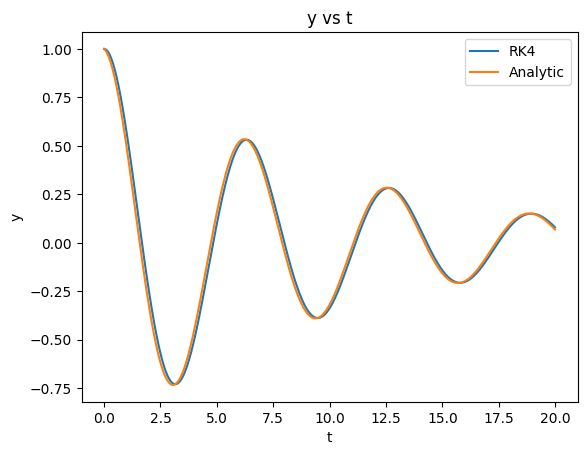

In [17]:
# Compute the analytical solution
garmar = LAM/2/M
omega = np.sqrt(K/M - garmar**2)
sol_analytic = A*np.exp(-garmar*t_eval)*np.cos(omega*t_eval + PHI)

# visualize the results
plt.figure()
# plt.plot(t_eval, sol_euler[0], label='Euler')
# plt.plot(t_eval, sol_rk2[0], label='RK2')
plt.plot(t_eval, sol_rk4[0], label='RK4')
plt.plot(t_eval, sol_analytic, label='Analytic')
# plt.plot(t_eval, sol_euler_ans[0], label='Euler_ans', linestyle='dashed')
# plt.plot(t_eval, sol_rk2_ans[0], label='RK2_ans', linestyle='dashed')
# plt.plot(t_eval, sol_rk4_ans[0], label='RK4_ans', linestyle='dashed')
# plt.plot(t_eval, sol_scipy.y[0], label='Scipy', linestyle='dashed')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('y vs t')
plt.show()




## Part 2

Now, let's explore the evolution of the three general cases:

* Underdamping: $\omega_0^2 > \gamma^2$
* Critical damping: $\omega_0^2 = \gamma^2$
* Overdamping: $\omega_0^2 < \gamma^2$

Vary $\lambda$, to the corresponding conditions:
* $\lambda = 0.2$ ($\omega_0^2 > \gamma^2$)
* $\lambda = 2$ ($\omega_0^2 = \gamma^2$)
* $\lambda = 2.4$ ($\omega_0^2 < \gamma^2$)

In [4]:
# TODO








# Forced Oscillation

* Use the IVP solver we developed. The only differences are the `func` and initial conditions.
* Modify the y' function (`func`) to simulate a forced oscillator (from t=0 to 100).
* Set the inital conditions: A=1, K=M=1, $\lambda=0.2$, $F_0=0.1$ and $\omega_f=0.8$.
* Make plots of position(t), velocity(t), and total energy(t).

In [5]:
# TODO







# Resonance

* Resonance will happen when $\omega_0 = \omega_f$ without damping.
* Modify your `demo3` but set $\lambda=0$ and $\omega_f=1$.
* Re-run your simulation with $\lambda=0.1$ and $0.01$.


In [6]:
# TODO







# Using `scipy`

Compare the results of our solver (`mysolver`) with the `solve_ivp` in `scipy`.

In [ ]:
# TODO







# Performance

We could mesure the performance of our solver and compare it with scipy.

In [7]:
#TODO







Which one is faster?